In [1]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset('penguins')

In [2]:
penguins.shape

(344, 7)

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


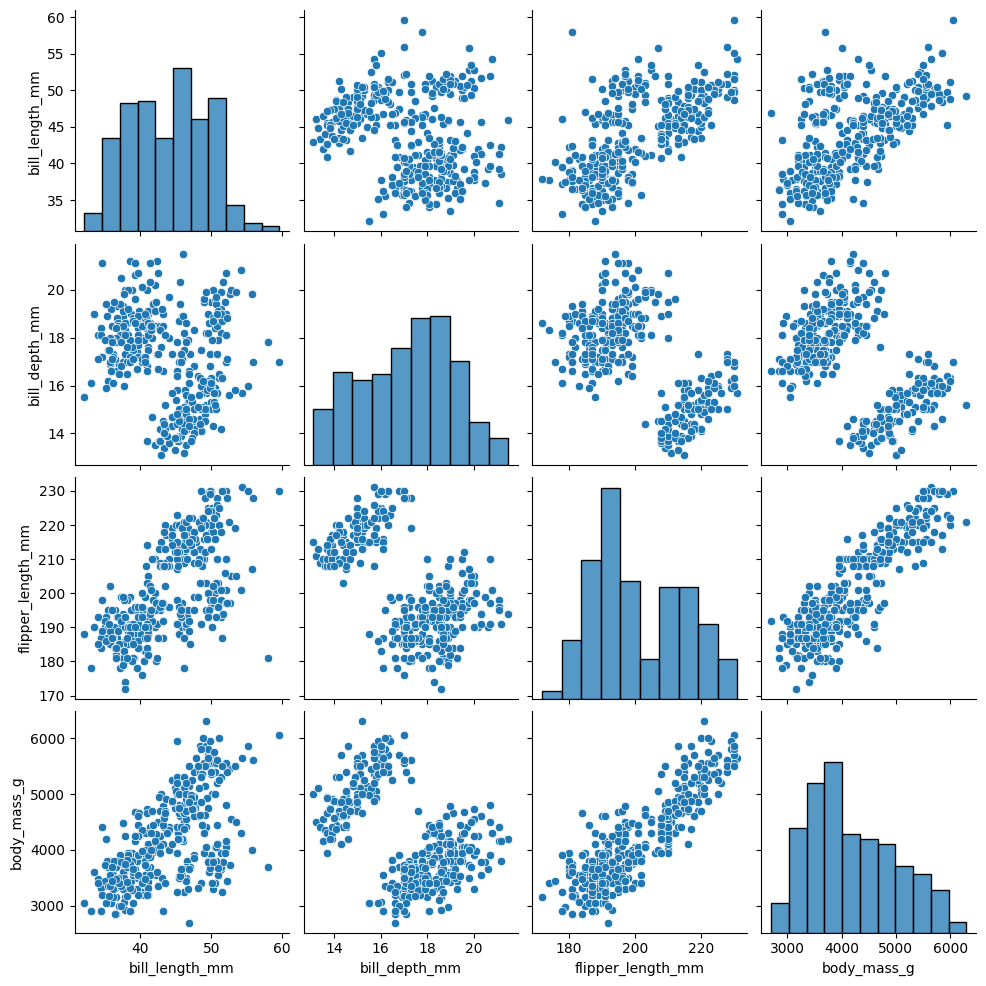

In [5]:
sns.pairplot(data = penguins)

In [6]:
penguins['sex'].isnull().sum()

11

In [7]:
penguins.isnull().mean().sort_values(ascending=False)

sex                  0.031977
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
species              0.000000
island               0.000000
dtype: float64

In [8]:
# pip install pandas-profiling==3.5.0

In [11]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(penguins)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# categorical variables - binary, nominal and ordinal
tips = sns.load_dataset('tips')

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
tips.shape

(244, 7)

In [16]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [17]:
tips['time'].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [20]:
# Pivot Table like in pandas
pd.crosstab(tips['time'], tips['day'], margins=True)

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,61,7,0,0,68
Dinner,1,12,87,76,176
All,62,19,87,76,244


In [22]:
pd.crosstab(tips['time'], tips['day'], margins=True, normalize=True)

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,0.250000,0.028689,0.000000,0.000000,0.278689
Dinner,0.004098,0.049180,0.356557,0.311475,0.721311
All,0.254098,0.077869,0.356557,0.311475,1.000000


In [23]:
# quantitative data
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [24]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

<AxesSubplot: xlabel='tip', ylabel='Count'>

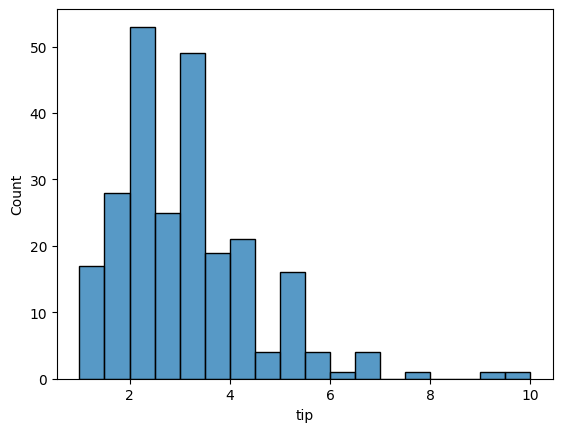

In [25]:
# Histogram
sns.histplot(tips['tip'])

In [31]:
# Group by
tips.groupby('time')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


In [33]:
# Merging datasets
hof_yes = pd.read_csv('hof_inducted.csv')
hof_no = pd.read_csv('hof_not_inducted.csv')

In [37]:
hof_yes

,player_id,yearid,votedby,ballots,needed,votes,inducted,category
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player
...,...,...,...,...,...,...,...,...
307,martipe02,2015,BBWAA,549.0,412.0,500.0,Y,Player
308,smoltjo01,2015,BBWAA,549.0,412.0,455.0,Y,Player
309,biggicr01,2015,BBWAA,549.0,412.0,454.0,Y,Player
310,griffke02,2016,BBWAA,440.0,330.0,437.0,Y,Player


In [38]:
hof_no

,player_id,yearid,votedby,ballots,needed,votes,inducted,category
0,lajoina01,1936,BBWAA,226,170.0,146,N,Player
1,speaktr01,1936,BBWAA,226,170.0,133,N,Player
2,youngcy01,1936,BBWAA,226,170.0,111,N,Player
3,hornsro01,1936,BBWAA,226,170.0,105,N,Player
4,cochrmi01,1936,BBWAA,226,170.0,80,N,Player
...,...,...,...,...,...,...,...,...
3803,grudzma01,2016,BBWAA,440,330.0,0,N,Player
3804,ausmubr01,2016,BBWAA,440,330.0,0,N,Player
3805,hamptmi01,2016,BBWAA,440,330.0,0,N,Player
3806,castilu01,2016,BBWAA,440,330.0,0,N,Player


In [36]:
hof_concat = pd.concat([hof_yes, hof_no])

In [39]:
# [0] finds number of rows
hof_concat.shape[0]

4120

In [40]:
hof_concat.shape[0] == hof_yes.shape[0] + hof_no.shape[0]

True

In [44]:
# Another example
heroes_information = pd.read_csv('heroes_information.csv')
super_hero_powers = pd.read_csv('super_hero_powers.csv')

In [45]:
heroes_information

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [46]:
super_hero_powers

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
heroes_merged = pd.merge(heroes_information, super_hero_powers, left_on='name', right_on='hero_names', how='inner')

In [53]:
heroes_merged

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,...,False,False,False,False,False,False,False,False,False,False
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,False
656,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,...,False,False,False,False,False,False,False,False,False,False
657,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,...,False,False,False,False,False,False,False,False,False,False
658,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,...,False,False,False,False,False,False,False,False,False,False


In [54]:
heroes_merged.shape

(660, 179)

In [56]:
heroes_information.shape

(734, 11)

In [57]:
super_hero_powers.shape

(667, 168)

In [58]:
heroes_merged.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,...,False,False,False,False,False,False,False,False,False,False
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False
